### Relacion magnitud-muertos periodo 2019-2021

#### 1. Leemos el excel que procesamos anteriormente

In [72]:
import pandas as pd

df = pd.read_excel("../database/data_procesada/database_2010_2024.xlsx")
df.head()

,Unnamed: 0,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
0,16,2010,1,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
1,19,2010,1,1.0,Bolivia (Plurinational State of),Americas,"Beni, Chuquisaca, Cochabamba, La Paz and Santa...",102200.0,Hydrological,NaN,26.0
2,22,2010,1,11.0,Panama,Americas,"Bocas del Toro, Chiriqui, Vergaguas, Colon pro...",23340.0,Hydrological,NaN,NaN
3,49,2010,1,26.0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...",122621.0,Hydrological,16000.0,41.0
4,55,2010,2,10.0,Peru,Americas,"La Esperanza, El Porvenir, Salaverry towns (Tr...",305800.0,Hydrological,NaN,20.0


#### 2. Filtramos la cant. de muertos

In [76]:
df = df.dropna(subset=['Total Deaths']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 503
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               410 non-null    int64  
 1   Start Year               410 non-null    int64  
 2   Start Month              410 non-null    int64  
 3   Start Day                401 non-null    float64
 4   Country                  410 non-null    object 
 5   Region                   410 non-null    object 
 6   Location                 408 non-null    object 
 7   Magnitude                410 non-null    float64
 8   Disaster Subgroup        410 non-null    object 
 9   Total Damage ('000 US$)  179 non-null    float64
 10  Total Deaths             410 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 38.4+ KB


#### 3. Filtramos el periodo que vamos a investigar (2019-2021)

In [80]:
df = df[df["Start Year"] >= 2019] #Año inicial
df = df[df["Start Year"] <= 2021] #Año final

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 439 to 503
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               52 non-null     int64  
 1   Start Year               52 non-null     int64  
 2   Start Month              52 non-null     int64  
 3   Start Day                51 non-null     float64
 4   Country                  52 non-null     object 
 5   Region                   52 non-null     object 
 6   Location                 52 non-null     object 
 7   Magnitude                52 non-null     float64
 8   Disaster Subgroup        52 non-null     object 
 9   Total Damage ('000 US$)  13 non-null     float64
 10  Total Deaths             52 non-null     float64
dtypes: float64(4), int64(3), object(4)
memory usage: 4.9+ KB


#### 5. Generamos nuevos indices

In [90]:
indices = list(range(1, len(df) + 1))
df.index = indices
df.head()

,Unnamed: 0,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
1,5117,2019,1,22.0,Spain,Europe,Asturies,6802.00,Hydrological,58000.0,4.0
2,5133,2019,1,27.0,Saudi Arabia,Asia,Tabouk,632315.72,Hydrological,NaN,12.0
3,5171,2019,3,2.0,Afghanistan,Asia,"Zheri, Dand,Damand, Arghandab, Spinboldak,Takh...",441236.30,Hydrological,NaN,63.0
4,5181,2019,2,1.0,Chile,Americas,"Arica y Parinacota, Tarapacá, Antofagasta regions",272110.34,Hydrological,NaN,6.0
5,5184,2019,2,11.0,Zimbabwe,Africa,"Masvingo, Mashonaland West",154678.41,Hydrological,NaN,26.0


#### 6. Guardamos la data 

In [95]:
df.to_excel("../database/data_procesada/database_2019_2021.xlsx")

#### 7. Leemos el archivo con la data procesada

In [98]:
import pandas as pd
df = pd.read_excel("../database/data_procesada/database_2019_2021.xlsx")

### Graficas

#### 1. Graficas de desastre por año

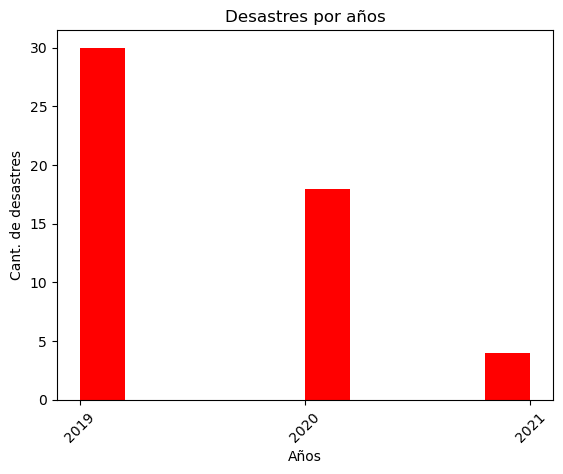

In [115]:
import matplotlib.pyplot as plt

dates = df["Start Year"]
plt.hist(dates, color="red")
plt.title("Desastres por años")
plt.ylabel("Cant. de desastres")
plt.xlabel("Años")
plt.xticks(dates.unique(), rotation=45)
plt.show()

#### 2. Grafica de desastres por region

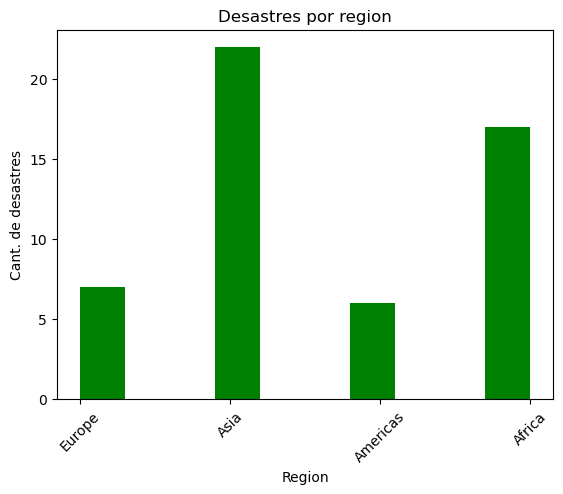

In [119]:
region = df["Region"]
plt.hist(region, color="green")
plt.title("Desastres por region")
plt.ylabel("Cant. de desastres")
plt.xlabel("Region")
plt.xticks(region.unique(), rotation=45)
plt.show()

### 3. Grafica de muertos

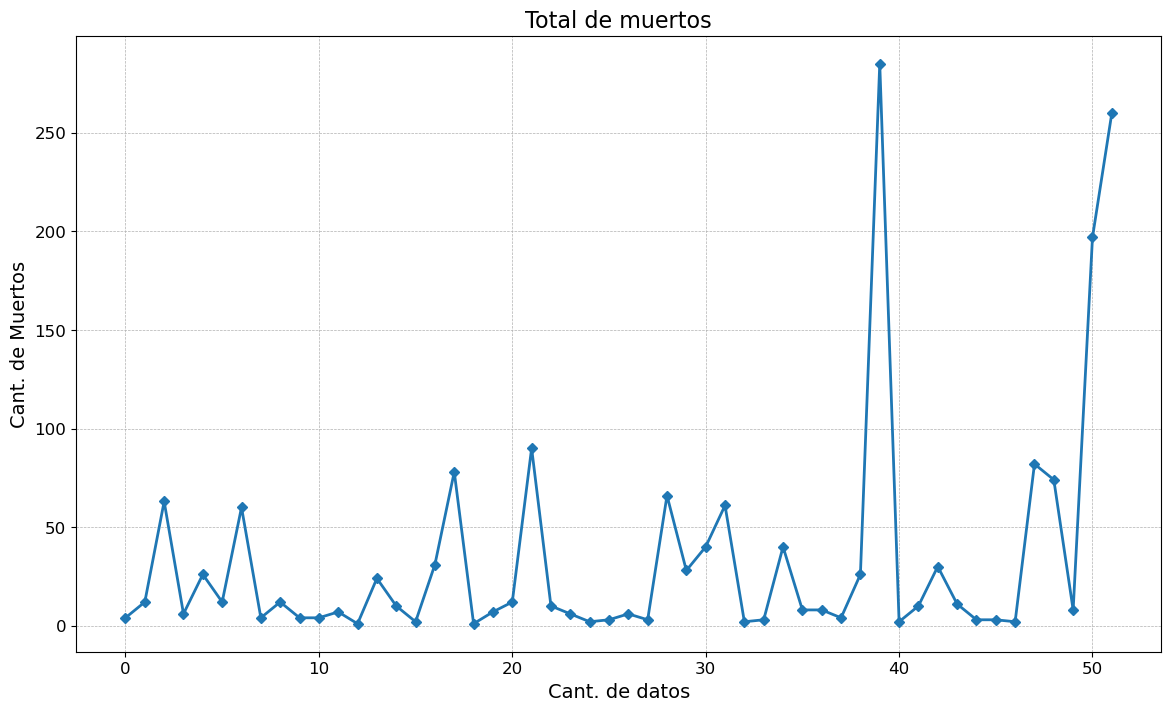

In [122]:
total_deaths = df['Total Deaths']

plt.figure(figsize=(14,8))
plt.plot(total_deaths, marker='D',linewidth=2, markersize=5)
plt.title('Total de muertos', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Cant. de Muertos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [124]:
total_deaths.describe()

count     52.000000
mean      33.711538
std       59.389488
min        1.000000
25%        4.000000
50%       10.000000
75%       33.250000
max      285.000000
Name: Total Deaths, dtype: float64

#### 4 Grafica de magnitud del desastre

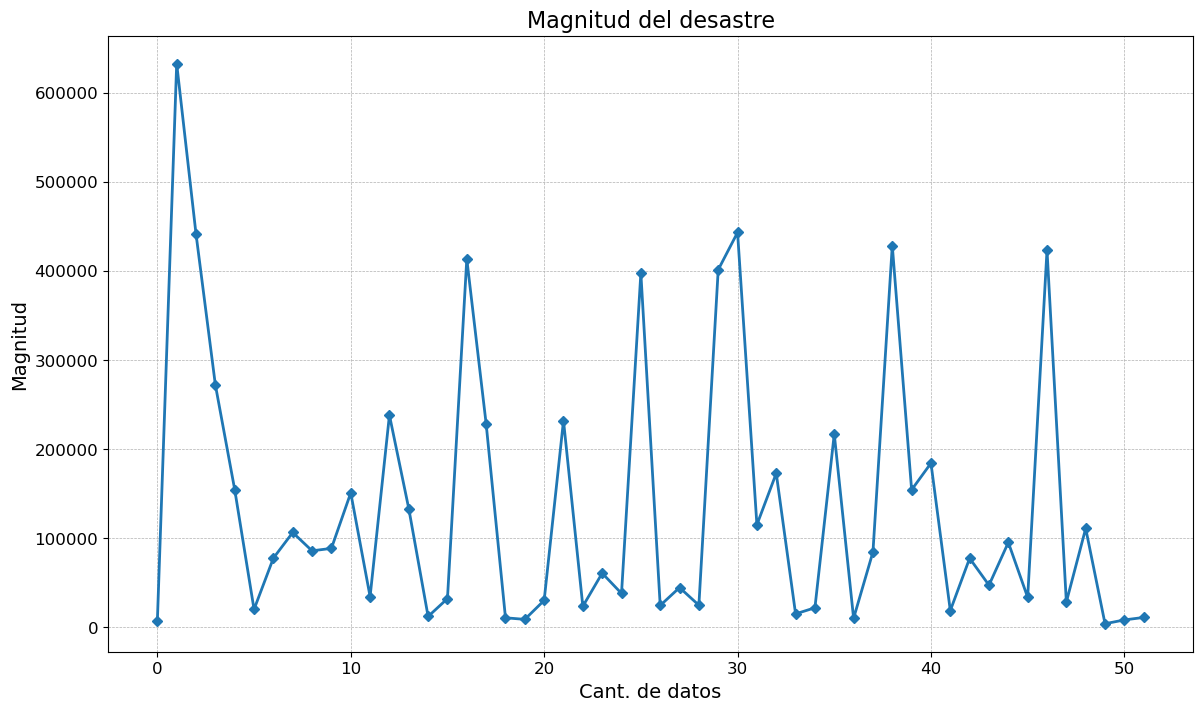

In [128]:
magnitud = df['Magnitude']
plt.figure(figsize=(14,8))
plt.plot(magnitud, marker='D',linewidth=2, markersize=5)
plt.title('Magnitud del desastre', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [130]:
magnitud.describe()

count        52.000000
mean     137239.872885
std      153337.592630
min        4231.930000
25%       24451.652500
50%       81237.535000
75%      192496.765000
max      632315.720000
Name: Magnitude, dtype: float64

##### 5 Relacion entre la magnitud-muertes

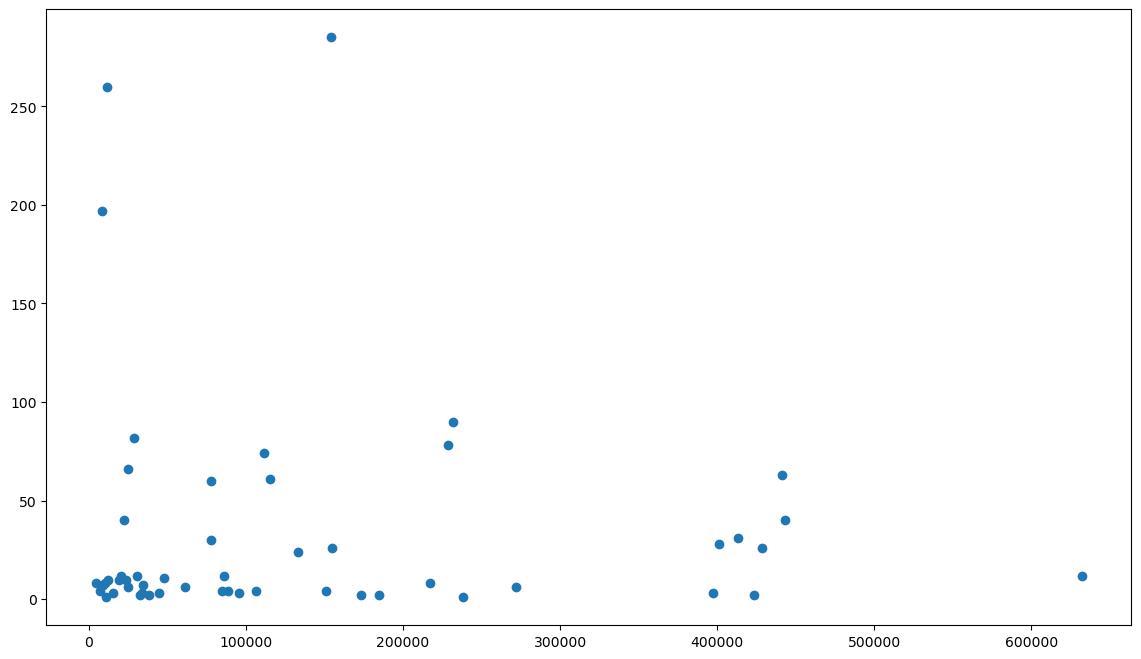

In [135]:
relacion_mag_deaths = pd.DataFrame({'Magnitud':df['Magnitude'],  'Muertos':df['Total Deaths']})
relacion_mag_deaths = relacion_mag_deaths.sort_values(by='Muertos')
relacion_mag_deaths.head()
plt.figure(figsize=(14,8))
plt.scatter(relacion_mag_deaths['Magnitud'], relacion_mag_deaths['Muertos'])
plt.show()